# **Analysis 2: Comparing tract-averaged means**

*Date:* 27 May 2025

*Description:* This notebook compares tract-averageed means for the Travelling Heads (TRAMFIX) dataset.

There are 4 key analyses run here:
1. Comparing tract-averaged means for FBA metrics (using site-specific pipeline)
2. Comparing tract-averaged means for FBA metrics (using group pipeline)
3. Comparing tract-averaged means for DTI metrics for comparison (using site-specific pipeline)
4. Comparing tract-averaged means for DTI metrics for comparison (using group pipeline)

## **Set up: import & organise data**

### Step 1: Set up input & output dirs

In [10]:
import pandas as pd
import os

## Input dir containing data
input_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/Analysis2_tractmeans'

## Output dir for plots
output_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/plots'

### Step 2: Import data

In [11]:
## FD (DF1)
input_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/Analysis2_tractmeans'
tract_fd_df1 = os.path.join(input_dir, 'FD_tractmeans_RM.csv')
tract_df1 = pd.read_csv(tract_fd_df1, sep=',')

In [7]:
## FC (DF2)
tract_fc_df2 = os.path.join(input_dir, 'FC_tractmeans_RM.csv')
tract_df2 = pd.read_csv(tract_fc_df2, sep=',')

In [8]:
## FDC (DF3)
tract_fdc_df3 = os.path.join(input_dir, 'FDC_tractmeans_RM.csv')
tract_df3 = pd.read_csv(tract_fdc_df3, sep=',')

In [19]:
## FA (DF_FA)
tract_fa_dir = os.path.join(input_dir, 'FA_tractmeans_poptemp1.csv')
tract_fa_df = pd.read_csv(tract_fa_dir, sep=',')

In [20]:
## ADC (DF_ADC)
tract_adc_dir = os.path.join(input_dir, 'ADC_tractmeans_poptemp1.csv')
tract_adc_df = pd.read_csv(tract_adc_dir, sep=',')

In [90]:
## FD (POP TEMP 2) - DF4
tract_fd_df4 = os.path.join(input_dir, 'FD_tractmeans_poptemp2.csv')
tract_df4 = pd.read_csv(tract_fd_df4, sep=',')

In [91]:
## FC (POP TEMP 2) - DF5
tract_fc_df5 = os.path.join(input_dir, 'FC_tractmeans_poptemp2.csv')
tract_df5 = pd.read_csv(tract_fc_df5, sep=',')

In [92]:
## FDC (POP TEMP 2) - DF6
tract_fc_df6 = os.path.join(input_dir, 'FDC_tractmeans_poptemp2.csv')
tract_df6 = pd.read_csv(tract_fc_df6, sep=',')

### Step 3: Separate site & ID

In [12]:
# Separate site & ID
tract_df1[['ID', 'Site']] = tract_df1['ID'].str.split('_', expand=True)
tract_df2[['ID', 'Site']] = tract_df2['ID'].str.split('_', expand=True)
tract_df3[['ID', 'Site']] = tract_df3['ID'].str.split('_', expand=True)

In [21]:
# DTI measures
tract_fa_df[['ID', 'Site']] = tract_fa_df['ID'].str.split('_', expand=True)
tract_adc_df[['ID', 'Site']] = tract_adc_df['ID'].str.split('_', expand=True)

In [93]:
# POP TEMP 2
tract_df4[['ID', 'Site']] = tract_df4['ID'].str.split('_', expand=True)
tract_df5[['ID', 'Site']] = tract_df5['ID'].str.split('_', expand=True)
tract_df6[['ID', 'Site']] = tract_df6['ID'].str.split('_', expand=True)

### Step 4: Convert to long

In [13]:
# DF1
tract_df1_long = tract_df1.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FD')

In [9]:
# DF2
tract_df2_long = tract_df2.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FC')

In [10]:
# DF3
tract_df3_long = tract_df3.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FDC')

In [22]:
# DF FA
tract_fa_df_long = tract_fa_df.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FA')

In [43]:
# DF ADC
tract_adc_df_long = tract_adc_df.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='MD')

In [94]:
# DF4
tract_df4_long = tract_df4.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FD')

In [95]:
# DF5
tract_df5_long = tract_df5.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FC')

In [96]:
# DF6
tract_df6_long = tract_df6.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FDC')

# **FBA metrics (site-specific pipeline)**

## **Tract-averaged FD**

### Step 1: Compute means & CV

In [ ]:
#subset = tract_df1_long[tract_df1_long['Tract'] == tract]
print(subset[subset['ID'] == 'TH001'])

         ID          Site     Tract        FD
2840  TH001  FloreyPrisma  UF_right  0.341841
2841  TH001    FloreyVida  UF_right  0.329574
2842  TH001           MBI  UF_right  0.332705
2843  TH001           RCH  UF_right  0.334463


In [238]:
pivot = subset.pivot_table(index='ID', columns='Site', values='FD')
subject_means = pivot.mean(axis=1)
print(subject_means)

ID
TH001    0.334646
TH002    0.358246
TH003    0.322031
TH004    0.355328
TH005    0.325037
TH006    0.326266
TH007    0.327916
TH008    0.305939
TH009    0.321109
TH010    0.361668
dtype: float64


In [14]:
cv_results_df1 = []
for tract in tract_df1_long['Tract'].unique():
    subset = tract_df1_long[tract_df1_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='FD')

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100    

    # global CV
    mean = subset['FD'].mean()
    std = subset['FD'].std() 
    cv = std/mean*100
    cv_results_df1.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})

# Convert to DataFrame
cv_df1 = pd.DataFrame(cv_results_df1)

In [263]:
print(cv_df1)

           Tract      mean       std  Global CV      CVws      CVbs
0        AF_left  0.354545  0.013915   3.924708  1.113328  3.955014
1       AF_right  0.354725  0.014530   4.096090  1.169225  4.125456
2       ATR_left  0.325250  0.012632   3.883849  2.001611  3.617996
3      ATR_right  0.330127  0.016145   4.890427  1.484616  4.902864
4             CA  0.341722  0.031677   9.269817  2.460869  9.376442
..           ...       ...       ...        ...       ...       ...
67  T_PREF_right  0.380896  0.017576   4.614259  1.277050  4.659466
68   T_PREM_left  0.371895  0.017132   4.606777  1.927165  4.464221
69  T_PREM_right  0.404963  0.017958   4.434360  2.037097  4.230594
70       UF_left  0.346057  0.017366   5.018251  2.209294  4.809691
71      UF_right  0.335296  0.018743   5.589980  2.118668  5.490878

[72 rows x 6 columns]


### Step 2: Compute ICC

In [15]:
# Compute ICC(3,1) for each tract

import pingouin as pg

icc_results_df1 = []
for tract in tract_df1_long['Tract'].unique():
    subset = tract_df1_long[tract_df1_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FD')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df1.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df1 = pd.DataFrame(icc_results_df1)

In [14]:
print(icc_df1)

           Tract   ICC_3_1          pval
0        AF_left  0.961612  1.907921e-18
1       AF_right  0.965662  4.279073e-19
2       ATR_left  0.865124  3.460696e-11
3      ATR_right  0.958204  5.964297e-18
4             CA  0.964435  6.852539e-19
..           ...       ...           ...
67  T_PREF_right  0.973446  1.356905e-20
68   T_PREM_left  0.938860  9.646569e-16
69  T_PREM_right  0.942172  4.586912e-16
70       UF_left  0.930183  5.659781e-15
71      UF_right  0.916422  6.196180e-14

[72 rows x 3 columns]


### Step 3: Combine results

In [16]:
results_df1 = pd.merge(cv_df1, icc_df1, on="Tract")
results_df1['Tract'] = results_df1['Tract'].str.replace("_", " ")

In [265]:
results_df1['CVws'].agg(['min', 'max'])

min    0.738331
max    3.634301
Name: CVws, dtype: float64

In [241]:
results_df1['CV'].agg(['min', 'max'])

min    2.286235
max    9.269817
Name: CV, dtype: float64

In [ ]:
results_df1['ICC(3,1)'].agg(['min', 'max'])

min    0.652389
max    0.980366
Name: ICC_3_1, dtype: float64

In [106]:
results_df1['ICC(3,1)'].mean()

0.9372854220612474

In [39]:
results_df1['ICC(2,1)'].agg(['min', 'max'])

min    0.538302
max    0.963352
Name: ICC(2,1), dtype: float64

### Step 4: Plot ICC

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/2375716757.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Spectral")
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/2375716757.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/2375716757.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


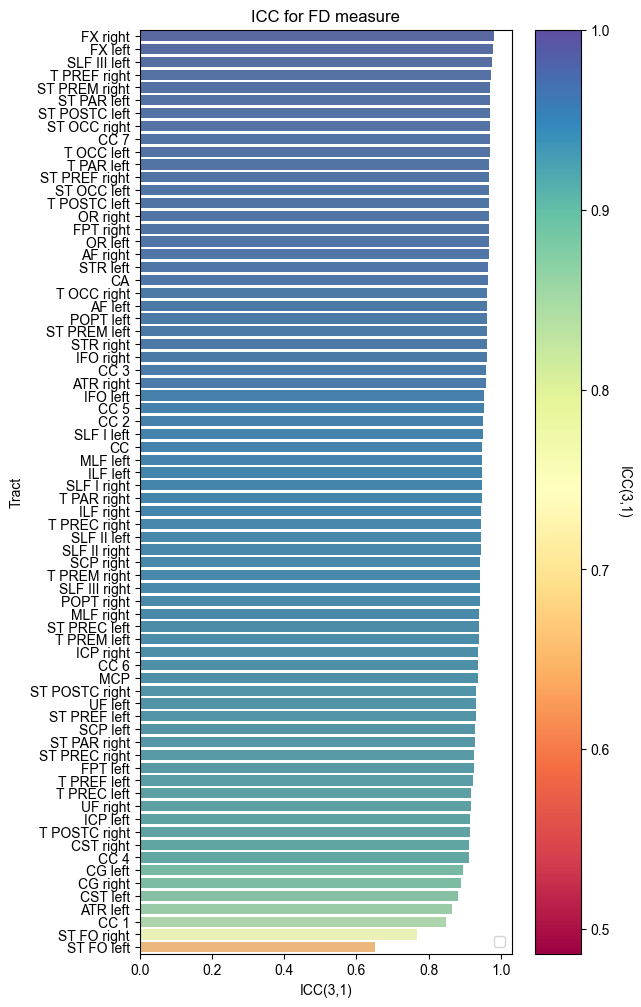

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Sort by ICC values (low to high)
icc_df1_sorted = results_df1.sort_values(by="ICC(3,1)", ascending=False)

plt.rcParams['font.family'] = 'Arial'

# manual colour mapping (range from 0 to 1 for ICC)
norm = mcolors.Normalize(vmin=results_fa_df['ICC(3,1)'].min(), vmax=1)
cmap = cm.get_cmap("Spectral")
# or using rocket without mapping
# norm = mcolors.Normalize(vmin=results_df1['ICC_3_1'].min(), vmax=results_df1['ICC_3_1'].max())
# cmap = cm.get_cmap("rocket")
colours = [cmap(norm(val)) for val in icc_df1_sorted['ICC(3,1)']]

# # Plot
# plt.figure(figsize=(6, 12))
# sns.barplot(data=icc_df1_sorted, x="ICC_3_1", y="Tract", palette=colours)

# plot
fig, ax = plt.subplots(figsize=(6,12))
bars = sns.barplot(
    data=icc_df1_sorted,
    y="Tract",
    x="ICC(3,1)",
    palette=colours,
    ax=ax
)
# Add vertical colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for matplotlib < 3.1
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.set_label("ICC(3,1)", rotation=270, labelpad=15)

# Format plot
#plt.xticks(rotation=90, fontsize=10)  # Rotate measure names for visibility
plt.ylabel("Tract")
plt.xlabel("ICC(3,1)")
plt.title("ICC for FD measure")
#plt.axhline(y=0.75, color='g', linestyle='--', label="Excellent Agreement (0.75)")
#plt.axhline(y=0.40, color='r', linestyle='--', label="Poor Agreement (0.40)")
plt.legend()

##output_plt = os.path.join(output_dir, "icc_plot_fd.svg")

#plt.savefig(os.path.join(output_dir, "icc_plot_fd_template1_spectral.svg"), format="svg", bbox_inches="tight")

plt.show()

In [87]:
icc_df1_sorted['hexcode'] = icc_df1_sorted['ICC(3,1)'].apply(lambda val: mcolors.to_hex(cmap(norm(val))))

## **Tract-averaged FC**

### Step 1: Compute means & CV

In [266]:
cv_results_df2 = []
for tract in tract_df2_long['Tract'].unique():
    subset = tract_df2_long[tract_df2_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='FC')

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100

    # global means    
    mean = subset['FC'].mean()
    std = subset['FC'].std() 
    cv = std/mean*100
    cv_results_df2.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})

# Convert to DataFrame
cv_df2 = pd.DataFrame(cv_results_df2)

### Step 2: Compute ICC

In [24]:
icc_results_df2 = []
for tract in tract_df2_long['Tract'].unique():
    subset = tract_df2_long[tract_df2_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FC')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df2.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df2 = pd.DataFrame(icc_results_df2)

### Step 3: Combine results

In [267]:
results_df2 = pd.merge(cv_df2, icc_df2, on="Tract")
results_df2['Tract'] = results_df2['Tract'].str.replace("_", " ")

In [268]:
results_df2['CVws'].agg(['min', 'max'])

min    0.538814
max    1.870703
Name: CVws, dtype: float64

In [26]:
results_df2['CV'].agg(['min', 'max'])

min     5.310129
max    10.907569
Name: CV, dtype: float64

In [28]:
results_df2['ICC(3,1)'].agg(['min', 'max'])

min    0.965792
max    0.998299
Name: ICC(3,1), dtype: float64

## **Tract-averaged FDC**

### Step 1: Compute means & CV

In [269]:
cv_results_df3 = []
for tract in tract_df3_long['Tract'].unique():
    subset = tract_df3_long[tract_df3_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='FDC')

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100

    # global mean
    mean = subset['FDC'].mean()
    std = subset['FDC'].std() 
    cv = std/mean*100
    cv_results_df3.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})
# Convert to DataFrame
cv_df3 = pd.DataFrame(cv_results_df3)

### Step 2: Compute ICC

In [34]:
icc_results_df3 = []
for tract in tract_df3_long['Tract'].unique():
    subset = tract_df3_long[tract_df3_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FDC')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df3.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df3 = pd.DataFrame(icc_results_df3)

### Step 3: Combine results

In [270]:
results_df3 = pd.merge(cv_df3, icc_df3, on="Tract")
results_df3['Tract'] = results_df3['Tract'].str.replace("_", " ")

In [271]:
results_df3['CVws'].agg(['min', 'max'])

min    1.231936
max    5.028824
Name: CVws, dtype: float64

In [36]:
results_df3['CV'].agg(['min', 'max'])

min     6.409881
max    18.118528
Name: CV, dtype: float64

In [38]:
results_df3['ICC(3,1)'].agg(['min', 'max'])

min    0.915776
max    0.994503
Name: ICC(3,1), dtype: float64

# **FBA metrics (group pipeline)**

## **Tract-averaged FD**

### Step 1: Compute means & CV

In [283]:
cv_results_df4 = []
for tract in tract_df4_long['Tract'].unique():
    subset = tract_df4_long[tract_df4_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='FD')

    # global CV
    mean = subset['FD'].mean()
    std = subset['FD'].std() 
    cv = std/mean*100

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100    

    cv_results_df4.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})

    #cv_results_df4.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_df4 = pd.DataFrame(cv_results_df4)

In [284]:
print(cv_df4)

           Tract      mean       std  Global CV      CVws      CVbs
0        AF_left  0.353252  0.012999   3.679688  0.953238  3.730798
1       AF_right  0.355065  0.014705   4.141473  0.925474  4.224194
2       ATR_left  0.325800  0.012359   3.793386  1.967469  3.532099
3      ATR_right  0.331275  0.016395   4.949119  1.455142  4.973832
4             CA  0.343192  0.031724   9.243936  2.181095  9.412394
..           ...       ...       ...        ...       ...       ...
67  T_PREF_right  0.380918  0.017617   4.624982  1.338394  4.655818
68   T_PREM_left  0.369115  0.017229   4.667731  2.025256  4.498351
69  T_PREM_right  0.403119  0.018180   4.509938  2.167291  4.264641
70       UF_left  0.346240  0.017613   5.086899  1.989884  4.965039
71      UF_right  0.333819  0.018815   5.636168  2.115256  5.543857

[72 rows x 6 columns]


### Step 2: Compute ICC

In [99]:
# Compute ICC(3,1) for each tract

icc_results_df4 = []
for tract in tract_df4_long['Tract'].unique():
    subset = tract_df4_long[tract_df4_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FD')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df4.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df4 = pd.DataFrame(icc_results_df4)

### Step 3: Combine results

In [285]:
results_df4 = pd.merge(cv_df4, icc_df4, on="Tract")
results_df4['Tract'] = results_df4['Tract'].str.replace("_", " ")

In [286]:
results_df4['CVws'].agg(['min', 'max'])

min    0.782566
max    4.014545
Name: CVws, dtype: float64

In [101]:
results_df4['CV'].agg(['min', 'max'])

min    2.334486
max    9.243936
Name: CV, dtype: float64

In [ ]:
results_df4['ICC(3,1)'].agg(['min', 'max'])

min    0.632729
max    0.980156
Name: ICC(3,1), dtype: float64

In [105]:
results_df4['ICC(3,1)'].mean()

0.9365526054704881

In [103]:
results_df4['ICC(2,1)'].agg(['min', 'max'])

min    0.487965
max    0.972835
Name: ICC(2,1), dtype: float64

### Step 4: Plot ICC

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/3045460587.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Spectral")
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/3045460587.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/3045460587.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


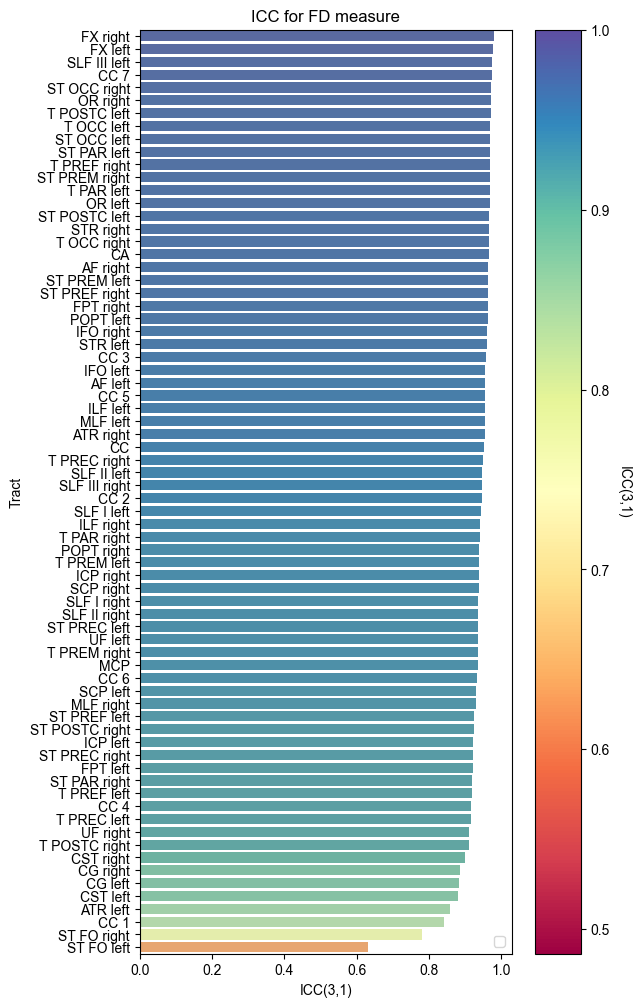

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Sort by ICC values (low to high)
icc_df4_sorted = results_df4.sort_values(by="ICC(3,1)", ascending=False)

plt.rcParams['font.family'] = 'Arial'

# manual colour mapping (range from 0 to 1 for ICC)
norm = mcolors.Normalize(vmin=results_fa_df['ICC(3,1)'].min(), vmax=1)
cmap = cm.get_cmap("Spectral")
# or using rocket without mapping
# norm = mcolors.Normalize(vmin=results_df1['ICC_3_1'].min(), vmax=results_df1['ICC_3_1'].max())
# cmap = cm.get_cmap("rocket")
colours = [cmap(norm(val)) for val in icc_df4_sorted['ICC(3,1)']]

# # Plot
# plt.figure(figsize=(6, 12))
# sns.barplot(data=icc_df1_sorted, x="ICC_3_1", y="Tract", palette=colours)

# plot
fig, ax = plt.subplots(figsize=(6,12))
bars = sns.barplot(
    data=icc_df4_sorted,
    y="Tract",
    x="ICC(3,1)",
    palette=colours,
    ax=ax
)
# Add vertical colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for matplotlib < 3.1
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.set_label("ICC(3,1)", rotation=270, labelpad=15)

# Format plot
#plt.xticks(rotation=90, fontsize=10)  # Rotate measure names for visibility
plt.ylabel("Tract")
plt.xlabel("ICC(3,1)")
plt.title("ICC for FD measure")
#plt.axhline(y=0.75, color='g', linestyle='--', label="Excellent Agreement (0.75)")
#plt.axhline(y=0.40, color='r', linestyle='--', label="Poor Agreement (0.40)")
plt.legend()

##output_plt = os.path.join(output_dir, "icc_plot_fd.svg")

plt.savefig(os.path.join(output_dir, "icc_plot_fd_template2_spectral.svg"), format="svg", bbox_inches="tight")

plt.show()

## **Tract-averaged FC**

### Step 1: Compute means & CV

In [287]:
cv_results_df5 = []
for tract in tract_df5_long['Tract'].unique():
    subset = tract_df5_long[tract_df5_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='FC')

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100

    # global means    
    mean = subset['FC'].mean()
    std = subset['FC'].std() 
    cv = std/mean*100
    cv_results_df5.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})

# Convert to DataFrame
cv_df5 = pd.DataFrame(cv_results_df5)

### Step 2: Compute ICC

In [288]:
# Compute ICC(3,1) for each tract

icc_results_df5 = []
for tract in tract_df5_long['Tract'].unique():
    subset = tract_df5_long[tract_df5_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FC')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df5.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df5 = pd.DataFrame(icc_results_df5)

### Step 3: Combine results

In [289]:
results_df5 = pd.merge(cv_df5, icc_df5, on="Tract")
results_df5['Tract'] = results_df5['Tract'].str.replace("_", " ")

In [290]:
results_df5['CVws'].agg(['min', 'max'])

min    0.59574
max    1.75775
Name: CVws, dtype: float64

In [291]:
results_df5['ICC(3,1)'].agg(['min', 'max'])

min    0.966521
max    0.998274
Name: ICC(3,1), dtype: float64

## **Tract-averaged FDC**

### Step 1: Compute means & CV

In [292]:
cv_results_df6 = []
for tract in tract_df6_long['Tract'].unique():
    subset = tract_df6_long[tract_df6_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='FDC')

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100

    # global mean
    mean = subset['FDC'].mean()
    std = subset['FDC'].std() 
    cv = std/mean*100
    cv_results_df6.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})
# Convert to DataFrame
cv_df6 = pd.DataFrame(cv_results_df6)

### Step 2: Compute ICC

In [293]:
icc_results_df6 = []
for tract in tract_df6_long['Tract'].unique():
    subset = tract_df6_long[tract_df6_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FDC')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df6.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df6 = pd.DataFrame(icc_results_df6)

### Step 3: Combine results

In [294]:
results_df6 = pd.merge(cv_df6, icc_df6, on="Tract")
results_df6['Tract'] = results_df6['Tract'].str.replace("_", " ")

In [295]:
results_df6['CVws'].agg(['min', 'max'])

min    1.216749
max    5.663279
Name: CVws, dtype: float64

In [296]:
results_df6['ICC(3,1)'].agg(['min', 'max'])

min    0.911462
max    0.994282
Name: ICC(3,1), dtype: float64

# **DTI metrics (site-specific pipeline)**

## **Tract-averaged FA**

### Step 1: Compute means & CV

In [53]:
cv_results_fa_df = []
for tract in tract_fa_df_long['Tract'].unique():
    subset = tract_fa_df_long[tract_fa_df_long['Tract'] == tract]
    mean = subset['FA'].mean()
    std = subset['FA'].std() 
    cv = std/mean*100
    cv_results_fa_df.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_fa_df = pd.DataFrame(cv_results_fa_df)

In [46]:
print(cv_fa_df)

           Tract      mean       std        CV
0        AF_left  0.347130  0.011431  3.292962
1       AF_right  0.354095  0.011700  3.304097
2       ATR_left  0.320152  0.014944  4.667722
3      ATR_right  0.324123  0.014454  4.459421
4             CA  0.339830  0.024340  7.162384
..           ...       ...       ...       ...
67  T_PREF_right  0.348202  0.013846  3.976367
68   T_PREM_left  0.353499  0.017711  5.010303
69  T_PREM_right  0.370795  0.019045  5.136246
70       UF_left  0.325854  0.014847  4.556250
71      UF_right  0.319809  0.013888  4.342577

[72 rows x 4 columns]


In [23]:
cv_results_fa_df = []
for tract in tract_fa_df_long['Tract'].unique():
    subset = tract_fa_df_long[tract_fa_df_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='FA')

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100    

    # global CV
    mean = subset['FA'].mean()
    std = subset['FA'].std() 
    cv = std/mean*100
    cv_results_fa_df.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})

# Convert to DataFrame
cv_fa_df = pd.DataFrame(cv_results_fa_df)

### Step 2: Compute ICC

In [24]:
# Compute ICC(3,1) for each tract

import pingouin as pg

icc_results_fa_df = []
for tract in tract_fa_df_long['Tract'].unique():
    subset = tract_fa_df_long[tract_fa_df_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FA')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_fa_df.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_fa_df = pd.DataFrame(icc_results_fa_df)

### Step 3: Combine results

In [25]:
results_fa_df = pd.merge(cv_fa_df, icc_fa_df, on="Tract")
results_fa_df['Tract'] = results_fa_df['Tract'].str.replace("_", " ")

In [274]:
results_fa_df['Global CV'].agg(['min', 'max'])

min    1.533739
max    7.162384
Name: Global CV, dtype: float64

In [275]:
results_fa_df['CVws'].agg(['min', 'max'])

min    0.652613
max    4.583591
Name: CVws, dtype: float64

In [257]:
results_fa_df['CVbs'].agg(['min', 'max'])

min    1.374594
max    6.996389
Name: CVbs, dtype: float64

In [64]:
results_fa_df['ICC(3,1)'].agg(['min', 'max'])

min    0.486360
max    0.963314
Name: ICC(3,1), dtype: float64

### Step 4: Plot results

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/1189556170.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Spectral")
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/1189556170.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/1189556170.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


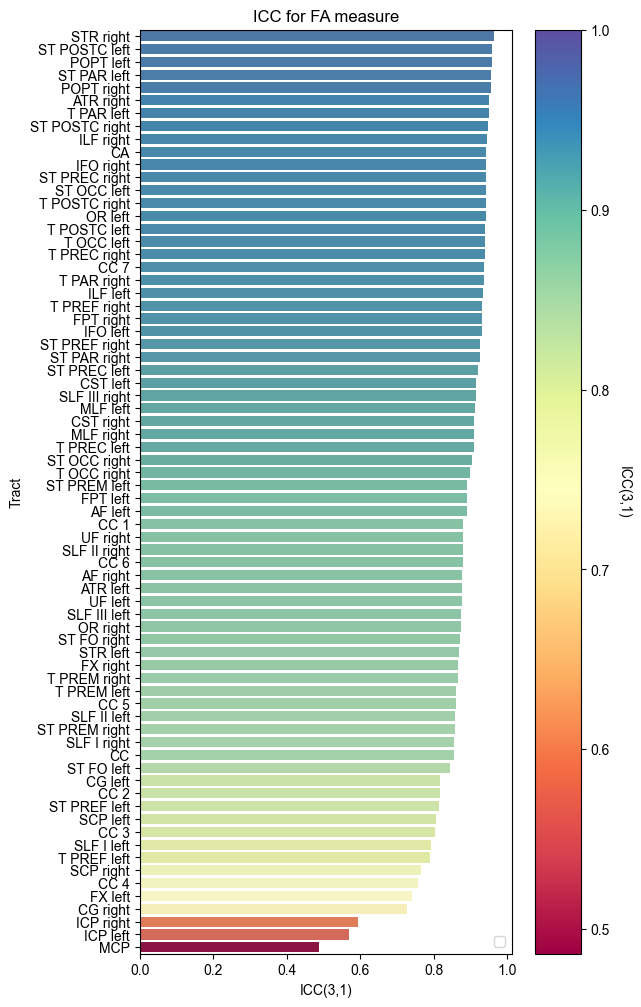

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Sort by ICC values (low to high)
icc_fa_sorted = results_fa_df.sort_values(by="ICC(3,1)", ascending=False)

plt.rcParams['font.family'] = 'Arial'

# manual colour mapping (range from 0 to 1 for ICC)
norm = mcolors.Normalize(vmin=results_fa_df['ICC(3,1)'].min(), vmax=1)
cmap = cm.get_cmap("Spectral")
colours = [cmap(norm(val)) for val in icc_fa_sorted['ICC(3,1)']]

# # Plot
# plt.figure(figsize=(6, 12))
# sns.barplot(data=icc_fa_sorted, x="ICC_3_1", y="Tract", palette=colours)

# plot
fig, ax = plt.subplots(figsize=(6,12))
bars = sns.barplot(
    data=icc_fa_sorted,
    y="Tract",
    x="ICC(3,1)",
    palette=colours,
    ax=ax
)
# Add vertical colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for matplotlib < 3.1
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.set_label("ICC(3,1)", rotation=270, labelpad=15)

# Format plot
#plt.xticks(rotation=90, fontsize=10)  # rotate tract names
plt.ylabel("Tract")
plt.xlabel("ICC(3,1)")
plt.title("ICC for FA measure")
plt.legend()

##output_plt = os.path.join(output_dir, "icc_plot_fd.svg")

plt.savefig(os.path.join(output_dir, "icc_plot_fa_template1_spectral.svg"), format="svg", bbox_inches="tight")

plt.show()

In [86]:
icc_fa_sorted['hexcode'] = icc_fa_sorted['ICC(3,1)'].apply(lambda val: mcolors.to_hex(cmap(norm(val))))

## **Tract-averaged ADC**

### Step 1: Compute means & CV

In [71]:
cv_results_adc_df = []
for tract in tract_adc_df_long['Tract'].unique():
    subset = tract_adc_df_long[tract_adc_df_long['Tract'] == tract]
    mean = subset['MD'].mean()
    std = subset['MD'].std() 
    cv = std/mean*100
    cv_results_adc_df.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_adc_df = pd.DataFrame(cv_results_adc_df)

In [276]:
cv_results_adc_df = []
for tract in tract_adc_df_long['Tract'].unique():
    subset = tract_adc_df_long[tract_adc_df_long['Tract'] == tract]
    pivot = subset.pivot_table(index='ID', columns='Site', values='MD')

    # compute within-subject CV
    subject_means = pivot.mean(axis=1)
    subject_stds = pivot.std(axis=1, ddof=1)
    subject_var = pivot.var(axis=1)
    #cvws_indiv = subject_stds / subject_means
    #CVws = cvws_indiv.mean() * 100
    cvws_squared_indiv = subject_var / (subject_means ** 2)
    CVws = np.sqrt(cvws_squared_indiv.mean()) * 100

    # compute between-subject CV
    group_mean = subject_means.mean()
    group_std = subject_means.std(ddof=1)
    CVbs = (group_std / group_mean) * 100    

    # global CV
    mean = subset['MD'].mean()
    std = subset['MD'].std() 
    cv = std/mean*100
    cv_results_adc_df.append({'Tract': tract, 'mean': mean, 'std': std, 
                           'Global CV': cv,
                           'CVws': CVws,
                           'CVbs': CVbs})

# Convert to DataFrame
cv_adc_df = pd.DataFrame(cv_results_adc_df)

### Step 2: Compute ICC

In [72]:
# Compute ICC(3,1) for each tract

import pingouin as pg

icc_results_adc_df = []
for tract in tract_adc_df_long['Tract'].unique():
    subset = tract_adc_df_long[tract_adc_df_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='MD')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_adc_df.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_adc_df = pd.DataFrame(icc_results_adc_df)

### Step 3: Combine results

In [277]:
results_adc_df = pd.merge(cv_adc_df, icc_adc_df, on="Tract")
results_adc_df['Tract'] = results_adc_df['Tract'].str.replace("_", " ")

In [278]:
results_adc_df['CVws'].agg(['min', 'max'])

min    0.899197
max    1.975811
Name: CVws, dtype: float64

In [260]:
results_adc_df['Global CV'].agg(['min', 'max'])

min    1.436986
max    9.556331
Name: Global CV, dtype: float64

In [75]:
results_adc_df['ICC(3,1)'].agg(['min', 'max'])

min    0.464929
max    0.969186
Name: ICC(3,1), dtype: float64

# **DTI metrics (group pipeline)**

# **Sample size estimates**

Here, we can use the ICC values from the FD and FA results to estimate observable effect size, then use this for sample size estimates

### Step 1: Extract relevant data

In [116]:
# Fornix
icc_fd_fornix_left = results_df1.loc[results_df1['Tract'] =='FX left', 'ICC(3,1)'].values[0]
icc_fd_fornix_right = results_df1.loc[results_df1['Tract'] =='FX right', 'ICC(3,1)'].values[0]
icc_fa_fornix_left = results_fa_df.loc[results_fa_df['Tract'] =='FX left', 'ICC(3,1)'].values[0]
icc_fa_fornix_right = results_fa_df.loc[results_fa_df['Tract'] =='FX right', 'ICC(3,1)'].values[0]

# CST
icc_fd_cst_left = results_df1.loc[results_df1['Tract'] =='CST left', 'ICC(3,1)'].values[0]
icc_fd_cst_right = results_df1.loc[results_df1['Tract'] =='CST right', 'ICC(3,1)'].values[0]
icc_fa_cst_left = results_fa_df.loc[results_fa_df['Tract'] =='CST left', 'ICC(3,1)'].values[0]
icc_fa_cst_right = results_fa_df.loc[results_fa_df['Tract'] =='CST right', 'ICC(3,1)'].values[0]

# AF
icc_fd_af_left = results_df1.loc[results_df1['Tract'] =='AF left', 'ICC(3,1)'].values[0]
icc_fd_af_right = results_df1.loc[results_df1['Tract'] =='AF right', 'ICC(3,1)'].values[0]
icc_fa_af_left = results_fa_df.loc[results_fa_df['Tract'] =='AF left', 'ICC(3,1)'].values[0]
icc_fa_af_right = results_fa_df.loc[results_fa_df['Tract'] =='AF right', 'ICC(3,1)'].values[0]

In [194]:
d_obs = 0.8 * np.sqrt(icc_fd_fornix_left)
n= analysis.solve_power(effect_size=d_obs, alpha=0.05, power=0.8)#, alternative='larger')
print(n)

26.107233723157986


In [1]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# set up
analysis = TTestIndPower()

n= analysis.solve_power(effect_size=0.8, alpha=0.05, power=0.8)#, alternative='larger')
print(n)

/Users/remika/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/remika/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


25.524571808897946


In [ ]:
### combine data

# Fornix
df_fx = pd.DataFrame({
    'Tract': ['Left (FD)', 'Right (FD)', 'Left (FA)', 'Right (FA)'],
    'ICC': [icc_fd_fornix_left, icc_fd_fornix_right, icc_fa_fornix_left, icc_fa_fornix_right]
})


### Step 2: Compute sample sizes per tract

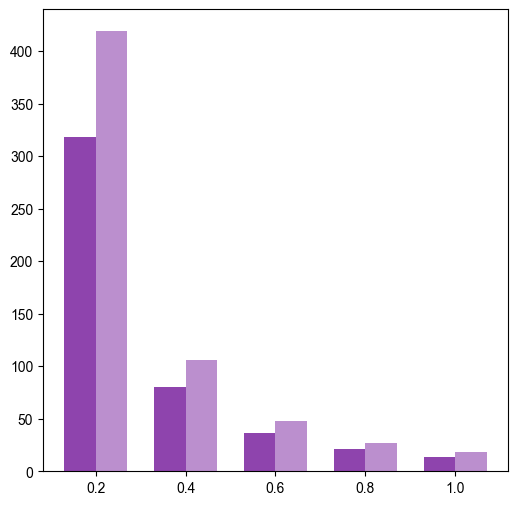

In [28]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# set up
analysis = TTestIndPower()
sample_sizes_fd = []
sample_sizes_fa = []

# inputs
tract = 'FX left'
alpha = 0.05
power = 0.8
true_effect_sizes = np.linspace(0.2, 1, 5)

# Extract tract data
icc_fd = results_df1.loc[results_df1['Tract'] == tract, 'ICC(3,1)'].values[0]
icc_fa = results_fa_df.loc[results_fa_df['Tract'] == tract, 'ICC(3,1)'].values[0]

# compute sample size
for d_true in true_effect_sizes:
    d_obs_fd = d_true * np.sqrt(icc_fd)
    d_obs_fa = d_true * np.sqrt(icc_fa)
    n_fd = analysis.solve_power(effect_size=d_obs_fd, alpha=alpha, power=power, alternative='larger')
    n_fa = analysis.solve_power(effect_size=d_obs_fa, alpha=alpha, power=power, alternative='larger')
    sample_sizes_fd.append(np.ceil(n_fd))
    sample_sizes_fa.append(np.ceil(n_fa))


x_labels = [f"{d:.1f}" for d in true_effect_sizes]
x = np.arange(len(true_effect_sizes))
width = 0.35

plt.figure(figsize=(6, 6))
plt.bar(x - width/2, sample_sizes_fd, width, label='FD', color='#8E44AD')
plt.bar(x + width/2, sample_sizes_fa, width, label='FA', color='#BB8FCE')
plt.xticks(ticks=x, labels=x_labels)
#plt.ylim(0, 80)
plt.show()

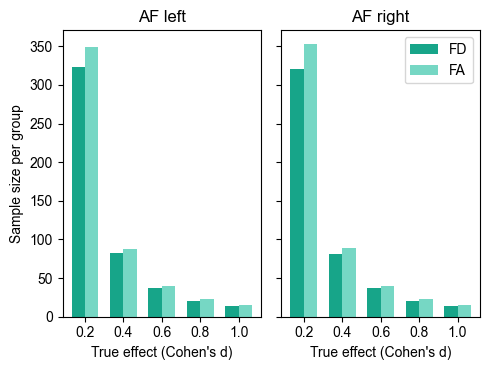

In [27]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib as mpl
import matplotlib.pyplot as plt


# Set default font to Arial
mpl.rcParams['font.family'] = 'Arial'

# set up
analysis = TTestIndPower()

# inputs
alpha = 0.05
power = 0.8
true_effect_sizes = np.linspace(0.2, 1, 5)
tracts = ['AF left', 'AF right']
x_labels = [f"{d:.1f}" for d in true_effect_sizes]
x = np.arange(len(x_labels))
width = 0.35

# subplots
n_tracts = len(tracts)
fig, axs = plt.subplots(1, n_tracts, figsize=(2.5 * n_tracts, 4), sharey=True)

# loop through bilateral tracts
for i, tract in enumerate(tracts):

    # Extract fd & fa icc
    icc_fd = results_df1.loc[results_df1['Tract'] == tract, 'ICC(3,1)'].values[0]
    icc_fa = results_fa_df.loc[results_fa_df['Tract'] == tract, 'ICC(3,1)'].values[0]

    sample_sizes_fd = []
    sample_sizes_fa = []

    # compute sample size
    for d_true in true_effect_sizes:
        d_obs_fd = d_true * np.sqrt(icc_fd)
        d_obs_fa = d_true * np.sqrt(icc_fa)
        n_fd = analysis.solve_power(effect_size=d_obs_fd, alpha=alpha, power=power, alternative='larger')
        n_fa = analysis.solve_power(effect_size=d_obs_fa, alpha=alpha, power=power, alternative='larger')
        sample_sizes_fd.append(np.ceil(n_fd))
        sample_sizes_fa.append(np.ceil(n_fa))

    ax = axs[i]
    ax.bar(x - width/2, sample_sizes_fd, width, label='FD', color='#17a589') # FX: #8E44AD ; CST: #2e86c1 ; AF: #17a589 
    ax.bar(x + width/2, sample_sizes_fa, width, label='FA', color='#76d7c4') # FX: #BB8FCE ; CST: #85c1e9 ; AF: #76d7c4 

    ax.set_title(f"{tract}")
    ax.set_xlabel("True effect (Cohen's d)")
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    #ax.set_ylim(0,71)
    #ax.grid(axis='y')
    #ax.legend()
    if i == 0:
        ax.set_ylabel("Sample size per group")
    if i == n_tracts - 1:
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])

#plt.savefig(os.path.join(output_dir, "samplesize_plot_af_small.svg"), format="svg", bbox_inches="tight")

plt.show()



In [ ]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

# set up
analysis = TTestIndPower()
sample_sizes_fd = []
sample_sizes_fa = []

# inputs
tract = 'FX left'
alpha = 0.05
power = 0.8
#true_effect_sizes = np.linspace(0.5, 1, 5)
sample_sizes = np.arange(10, 55, 5)

# Extract tract data
icc_fd = results_df1.loc[results_df1['Tract'] == tract, 'ICC(3,1)'].values[0]
icc_fa = results_fa_df.loc[results_fa_df['Tract'] == tract, 'ICC(3,1)'].values[0]

# compute sample size
for n_samples in sample_sizes:
    d_obs_fd = d_true * np.sqrt(icc_fd)
    d_obs_fa = d_true * np.sqrt(icc_fa)
    n_fd = analysis.solve_power(effect_size=d_obs_fd, alpha=alpha, power=power)#, alternative='larger')
    n_fa = analysis.solve_power(effect_size=d_obs_fa, alpha=alpha, power=power)#, alternative='larger')
    sample_sizes_fd.append(np.ceil(n_fd))
    sample_sizes_fa.append(np.ceil(n_fa))


x_labels = [f"{d:.1f}" for d in true_effect_sizes]
x = np.arange(len(true_effect_sizes))
width = 0.35

plt.figure(figsize=(6, 6))
plt.bar(x - width/2, sample_sizes_fd, width, label='FD', color='#8E44AD')
plt.bar(x + width/2, sample_sizes_fa, width, label='FA', color='#BB8FCE')
plt.xticks(ticks=x, labels=x_labels)
plt.ylim(0, 80)
plt.show()